# Project: Finding Heavy Traffic Indicators on I-94

#### We will analyze a dataset about the westbound traffic on the I-94 Interstate highway.

#### Our analysis aims to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

We are importing Pandas library and importing a CSV into a Pandas Dataframe.

In [4]:
import pandas as pd
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

Showing the first five (5) rows of the df Dataframe.

In [5]:
print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


Showing the last five (5) rows of the df Dataframe.

In [6]:
print(df.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


Printing general information about the Dataframe. This command helps us to know our dataset better. It has nine (9) columns and 48204 rows. There are no missing values. Three (3 ) columns are float, three (3) columns are int, and four (4) are object types.

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


The code below helps us to draw a graph in a Jupiter cell.

In [8]:
%matplotlib inline

We create a histogram chart with data in the "traffic volume" columns.

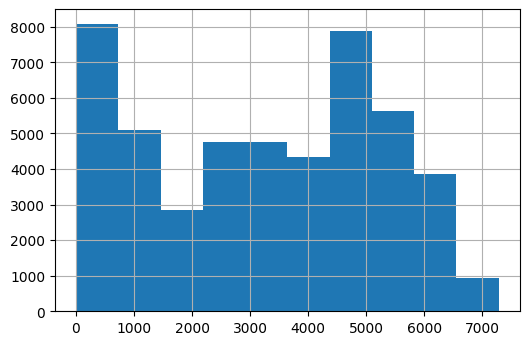

In [9]:
df['traffic_volume'].hist()

Getting some statistics from the column "traffic_volume". There are 48204 values in the column; The mean value is 3259.81; the standard deviation is 1986.86; the minimum value is 0; the maximum value is 7280.

In [10]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The column named "date_time" is a type object (string). We are converting the value of this column to is DateTime object.

In [11]:
df['date_time'] = pd.to_datetime(df['date_time'])

By checking the type of columns, you can see that "date_time" is a datetime type.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


Fetching the value of the hour from each raw.

In [13]:
df['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

We'll split the data of the df data frame into two new data frames: 1) a data frame that stores values that range from 7 PM to 7 AM (night time); 2) a data frame that stores values that range from 7 AM to 7 PM (day time).

The code below creates the nighttime dataframe.

In [14]:
df_day_time = df[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]

The code below creates the daytime dataframe.

In [15]:
df_night_time = df[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7) ]

There 23877 rows and nine (9) columns in the dataframe.

In [16]:
print(df_day_time.shape)

(23877, 9)


There 24327 rows and nine (9) columns in the dataframe.

In [17]:
print(df_night_time.shape)

(24327, 9)


The code below creates a histogram chart with a title and labels based on the column "traffic_volume" of the daytime Dataframe.

(0.0, 8000.0)

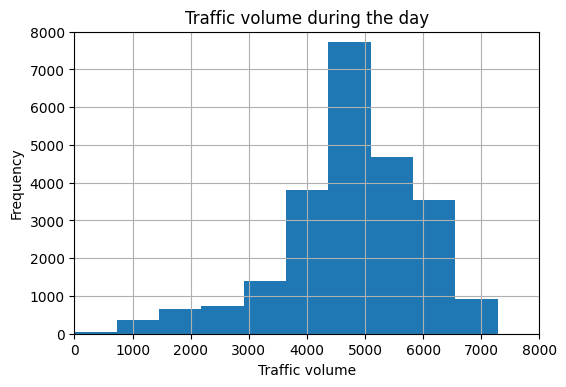

In [18]:
import matplotlib.pyplot as plt
df_day_time['traffic_volume'].hist()
plt.title('Traffic volume during the day')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

The code below creates a histogram chart with a title and labels based on the column "traffic_volume" of the nightime Dataframe.

(0.0, 8000.0)

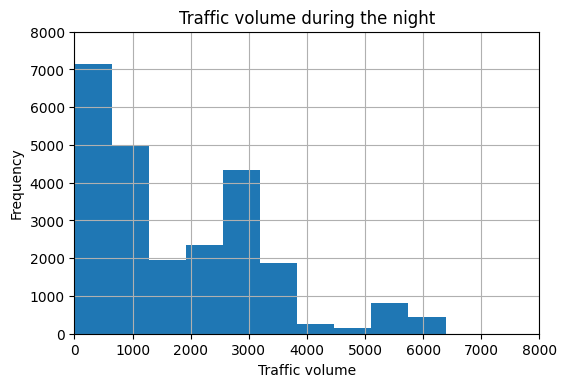

In [19]:
df_night_time['traffic_volume'].hist()
plt.title('Traffic volume during the night')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)


### What shape do the histograms have and what does that indicate?

The daytime histogram has a skewed left shape. It indicates that most of the values are located at the right of the chart, where the higher values are.

The night histogram has a skewed right shape. It indicates that most of the values are located at the left of the chart, where the lower values are.

In [20]:
df_day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [21]:
df_night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

### If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

We will focus on traffic during the day because it is heavier (4762 average volume) than the night, which is 1785.37.

### Analizing traffic by month of the year

The code takes the month from the column "date_time", and creates a new column called "month" on the Dataframe. So, the column "month" will have values ranging from 1 to 12 each one representing a month of the year. 

Then, the "groupby" method aggregates the data into a new object based on the column "month" data. 

In [22]:
import warnings
warnings.filterwarnings('ignore')

df_day_time['month'] = df_day_time['date_time'].dt.month
by_month_day = df_day_time.groupby('month').mean()
by_month_day['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

The code takes the month from the column "date_time", and creates a new column called "month" on the Dataframe. So, the column "month" will have values ranging from 1 to 12 each one representing a month of the year. 

Then, the "groupby" method aggregates the data into a new object based on the column "month" data. 

In [23]:
import warnings
warnings.filterwarnings('ignore')

df_night_time['month'] = df_night_time['date_time'].dt.month
by_month_night = df_night_time.groupby('month').mean()
by_month_night['traffic_volume']

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

The chart below shows that the traffic gets heavy from month three (March) to month 6 (June). Then, there is a downfall in the traffic in July (month 7), and it spikes again in month 8 (August), which is the peak of the year. So, the traffic remains high until month 10 (October). After that, the traffic gets slower until the end of the year.

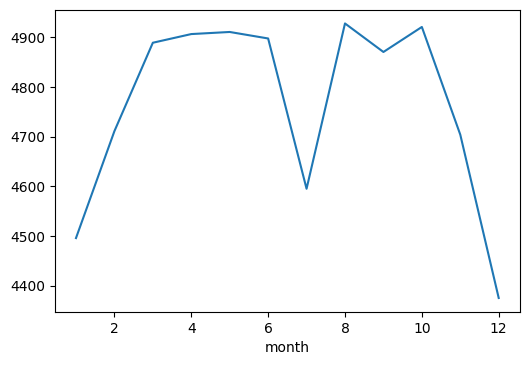

In [24]:
by_month_day['traffic_volume'].plot.line()

### Analizing traffic by day of the week

The code takes the day of the week from the column "date_time", and creates a new column called "dayofweek" on the Dataframe. So, the column "dayofweek" will have values ranging from 0 to 6 each one representing a day of the week (Monday, Thuesday, etc.). 

Then, the "groupby" method aggregates the data into a new object based on the column "by_day_dayofweek" data. In the end, you'll have a Daframe with mean values ordered by the day of the week (seven rows).

In [25]:
df_day_time['dayofweek'] = df_day_time['date_time'].dt.dayofweek
by_day_dayofweek = df_day_time.groupby('dayofweek').mean()
by_day_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

The code below creates a line chart visualizing the relationship between traffic volume (Y-axis) and the day of the week (X-axis). We can see that, in general, the traffic during the weekdays is pretty stable. However, it declines sharply during the weekends.

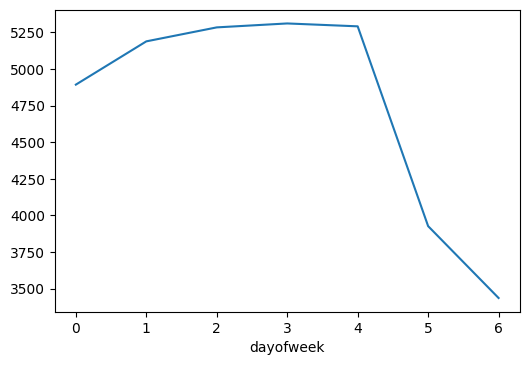

In [26]:
by_day_dayofweek['traffic_volume'].plot.line()
plt

### Analizing traffic by the hour of the day

The code takes the hour of the date from the column "date_time", and creates a new column called "hour" on the Dataframe. So, the column "hour" will have values ranging from 0 to 23, each one representing an 
hour of the day.

Then, we'll create two Dataframe: a) day_busines_days; b) day_weekend. Then, I'll take the Dataframe with the weekdays' data (day_busines_days) to aggregate the data by the hour using the method "groupby". The same  process will be done for the weekends.

* Monday == 0
* Thuesday == 1
* Wednesday == 2
* Thrusday == 3
* Friday == 4
* Saturday == 5
* Sunday == 6

In [36]:
df_day_time['hour'] = df_day_time['date_time'].dt.hour
day_bussiness_days = df_day_time.copy()[df_day_time['dayofweek'] <= 4] 
day_weekend = df_day_time.copy()[df_day_time['dayofweek'] >= 5] 
by_hour_business_day = day_bussiness_days.groupby('hour').mean()
by_hour_weekend_day = day_weekend.groupby('hour').mean()

Visualizing the traffic volume (the mean) by hour on a weekday.

In [37]:
print(by_hour_business_day['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


Visualizing the traffic volume (the mean) by hour on a weekends.

In [38]:
print(by_hour_weekend_day['traffic_volume'])

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


In [39]:
#fig = plt.figure(figsize=(11,3.5))

The code below creates a chart showing traffic volume by hour (daytime) during the weekday. You can see that 4 PM is the hour with the most traffic. After 6 PM, the traffic volume is declining. 

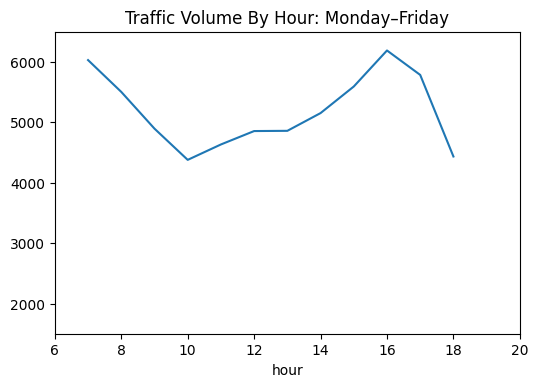

In [40]:
#plt.subplot(1,2,1)
by_hour_business_day['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')
plt.show()

The code below creates a chart showing traffic volume by the hour (daytime) during the weekend. You can see that the traffic volume is less than on a weekday.  The hour of afternoon seems to be more traffic than in the morning. 

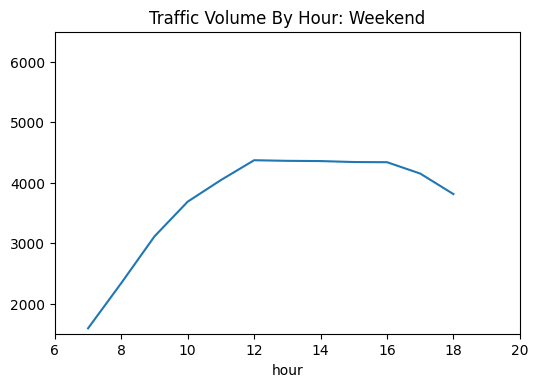

In [41]:
#plt.subplot(1, 2, 2)
by_hour_weekend_day['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')
plt.show()

Find the correlation values between traffic_volume and the numerical weather columns.

### Analizing traffic by the weather


Getting the column's names from the Dataframe df_day_time

In [87]:
numeric_cols = list(df_day_time.select_dtypes(include='number').columns)
print(numeric_cols)

['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume', 'month', 'dayofweek', 'hour']


Below, you can see the correlation between diffrent columsn in the Dataframe df_day_time.

In [88]:
df_day_time.corr(method='pearson')

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317,0.222072,0.000188,0.162691
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697,0.001176,-0.009683,0.008279
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265,0.026768,-0.008814,0.003923
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932,0.000595,-0.041980,0.023685
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000,-0.022337,-0.416453,0.172704
month,0.222072,0.001176,0.026768,0.000595,-0.022337,1.000000,0.013656,0.008145
dayofweek,0.000188,-0.009683,-0.008814,-0.041980,-0.416453,0.013656,1.000000,-0.002767
hour,0.162691,0.008279,0.003923,0.023685,0.172704,0.008145,-0.002767,1.000000


The code below shows the correlation between the column "traffic_volume" and the numeric columns. The results shows that the strongest correlation is between traffic_volume and the temperature (the temp column).

In [89]:
df_day_time[numeric_cols].corrwith(df_day_time['traffic_volume'])

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
dtype: float64

Now, we build a scatter chart with data from the columsn "traffic_volume" and "temp".

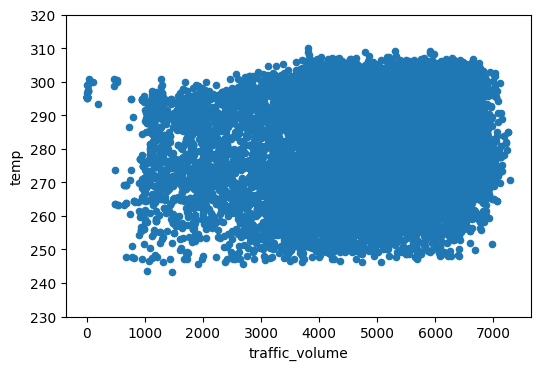

In [90]:
df_day_time.plot.scatter(x='traffic_volume', y='temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

Do any of these weather columns seem like reliable indicators for heavy traffic? 

No, it is not a good indicator


We'll group data by the column "weather_main" and "weather_description" values in two distinct Dataframe. Then, we will calculate the mean to aggregate the data.

In [91]:
by_weather_main = df_day_time.groupby('weather_main').mean()
by_weather_description = df_day_time.groupby('weather_description').mean()

Plot a horizontal bar plot for the traffic_volume column of by_weather_main

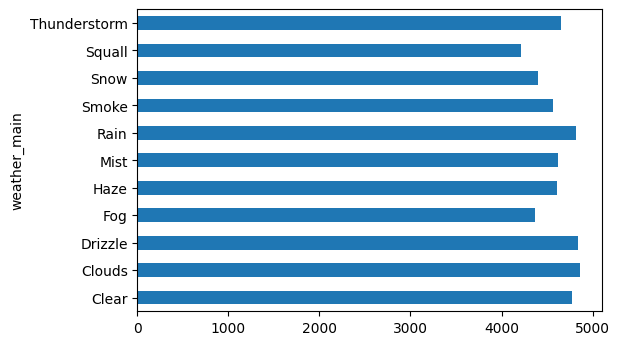

In [92]:
by_weather_main['traffic_volume'].plot.barh()

Analyze the bar plot. Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator? 

No, there no a clear indicator in the chart above.

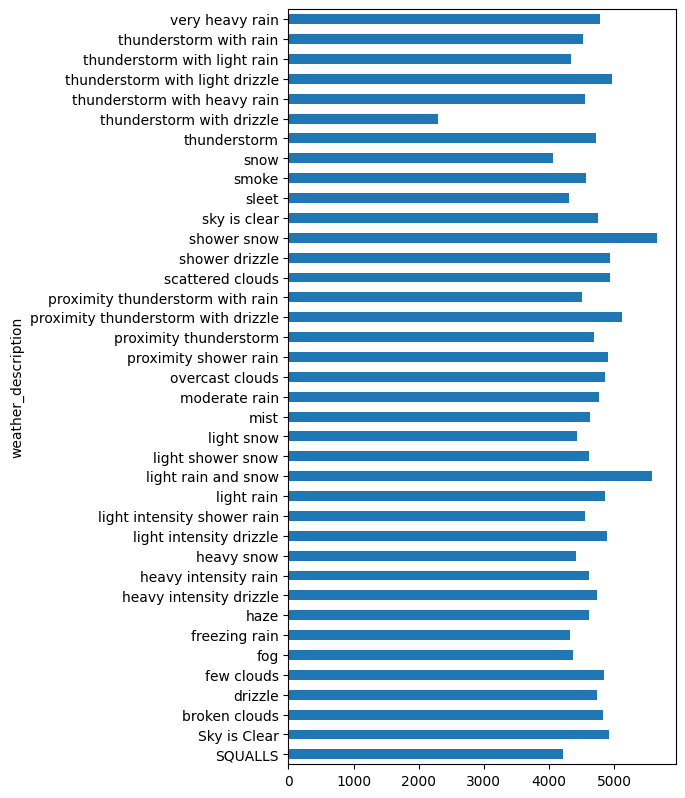

In [93]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

Is there any traffic volume exceeding 5,000 cars? Can you find any weather type as a heavy traffic indicator?

Yes, there are two columns exceeding 5000 cars: a) light rain and snow; b) shower snow.